# Project Scenario

You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

## Task 1: Become familiar with the dataset

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('boston_housing.csv')

df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [14]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable

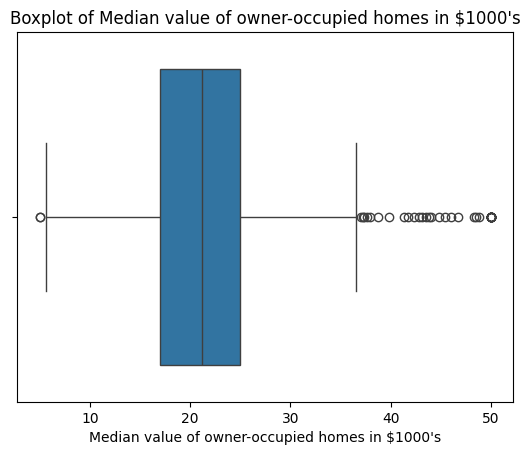

In [15]:
ax = sns.boxplot(df, x="MEDV")
ax.set_title("Boxplot of Median value of owner-occupied homes in $1000's")
ax.set_xlabel("Median value of owner-occupied homes in $1000's")
plt.show()

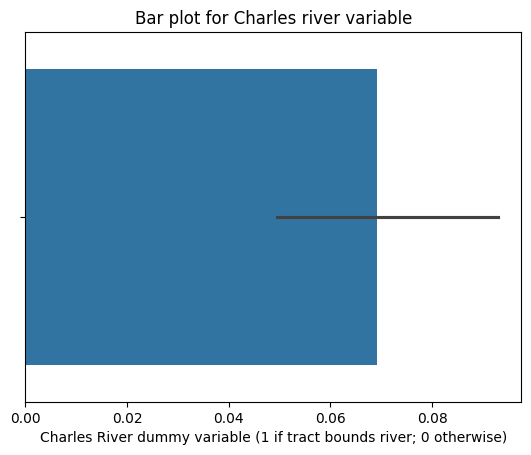

In [16]:
ax = sns.barplot(df, x="CHAS")
ax.set_title("Bar plot for Charles river variable")
ax.set_xlabel("Charles River dummy variable (1 if tract bounds river; 0 otherwise)")
plt.show()

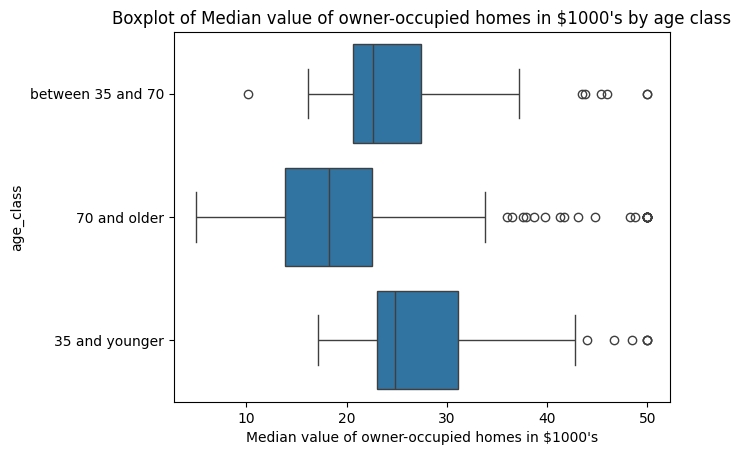

In [17]:
df.loc[(df['AGE']<=35),'age_class']='35 and younger'
df.loc[(df['AGE']>35)&(df['AGE']<70),'age_class']='between 35 and 70'
df.loc[df['AGE']>=70,'age_class']='70 and older'

ax = sns.boxplot(df, x="MEDV", y="age_class")
ax.set_title("Boxplot of Median value of owner-occupied homes in $1000's by age class")
ax.set_xlabel("Median value of owner-occupied homes in $1000's")
plt.show()

On average, older people own lower value homes

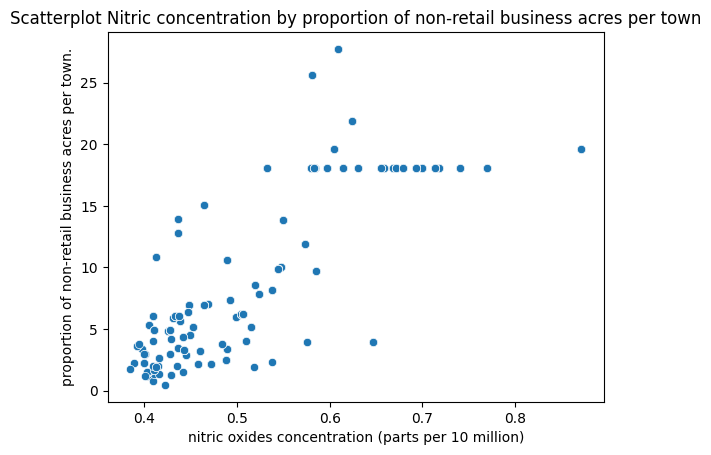

In [18]:
ax = sns.scatterplot(df, x="NOX", y="INDUS")
ax.set_title("Scatterplot Nitric concentration by proportion of non-retail business acres per town")
ax.set_xlabel("nitric oxides concentration (parts per 10 million)")
ax.set_ylabel("proportion of non-retail business acres per town.")
plt.show()

There seems to be a relationship between the two variables (Correlation).

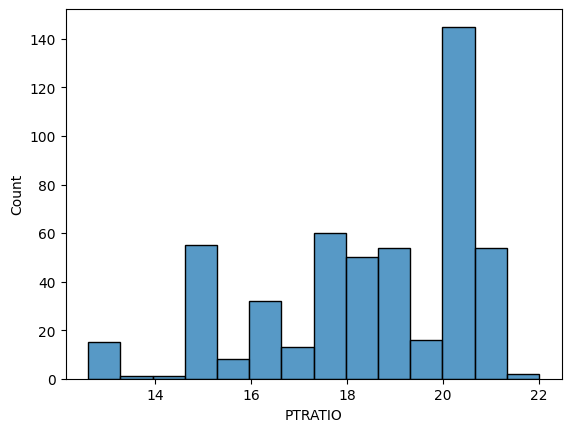

In [19]:
sns.histplot(data=df, x="PTRATIO")
ax.set_xlabel("pupil-teacher ratio by town")
plt.show()

The number of pupil per teacher seems to be negatively skewed with a median around 20

## Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### Hypothesis:
There is no difference in median value of houses bounded by the Charles river

In [20]:
from scipy.stats import ttest_ind

# Perform the t-test
t_stat, p_value = ttest_ind(df[df["CHAS"] == 0]["MEDV"], df[df["CHAS"] == 1]["MEDV"])

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -3.996437466090509, P-value: 7.390623170519905e-05


P value is below 0.05 so we can safely reject the null hypothesis and hence there is a difference in median value of houses bounded by the Charles river.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#### Hypothesis:

There is no difference in Median values of houses for each proportion of owner occupied units built prior to 1940 (AGE)

In [21]:
from scipy.stats import f_oneway

# Perform the one-way ANOVA
f_stat, p_value = f_oneway(df[df['age_class']=='35 and younger']['MEDV'], 
                           df[df['age_class']=='between 35 and 70']['MEDV'], 
                           df[df['age_class']=='70 and older']['MEDV'])

print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15


P value is below 0.05 so we can safely reject the null hypothesis and hence there is a difference in median value of houses for each proportion of owner occupied units built prior to 1940.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### Hypothesis

There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [22]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value
corr_coefficient, p_value = pearsonr(df["NOX"], df["INDUS"])

print(f"Pearson correlation coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.763651446920915
P-value: 7.913361061241532e-98


P value is below 0.05 so we can safely reject the null hypothesis and hence there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [23]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model
model = ols('MEDV ~ DIS', data=df).fit()

# Get the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        14:27:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

In [26]:
import math

math.sqrt(0.062)

0.24899799195977465

The coefficient for DIS is 1.0916 so the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes is 1.0916